# Raw Analytics - Uber & Ola Ride Booking & Cancellation Data

---

Etapa de análise dos dados brutos, com o foco em análise exploratória de dados (EDA).
Dessa parte se espera compreender a estrutura, comportamento e a qualidade dos dados, o que servira para as transformações, limpezas e enriquecimentos que virão a seguir.

Os principáis objetivos dessa análise exploratória são:

* Validação e Integridade
* Data Profiling e Categorização
* Avaliação de Qualidade dos Dados
* Identificação de Visualização de Outliers
* Detecção de Anomalias

# 1. Bibliotecas

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# 2. Carregamento dos Dados e Visualização Inicial

In [2]:
spark = SparkSession.builder.appName("raw").getOrCreate()

df_raw = spark.read.csv("dados_brutos.csv", header=True, nullValue="null", emptyValue=None, nanValue="nan")
df_raw.show(n=10)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/19 09:53:42 WARN Utils: Your hostname, CyberCore, resolves to a loopback address: 127.0.1.1; using 172.29.111.35 instead (on interface wlp0s20f3)
26/01/19 09:53:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/19 09:53:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-------------------+--------+-------------+--------------------+-----------+------------+-----------------+-------------+-----+-----+--------------------------+------------------------+----------------+-----------------------+-------------+--------------+-------------+--------------+---------------+--------------+----+
|               Date|    Time|   Booking_ID|      Booking_Status|Customer_ID|Vehicle_Type|  Pickup_Location|Drop_Location|V_TAT|C_TAT|Canceled_Rides_by_Customer|Canceled_Rides_by_Driver|Incomplete_Rides|Incomplete_Rides_Reason|Booking_Value|Payment_Method|Ride_Distance|Driver_Ratings|Customer_Rating|Vehicle Images|_c20|
+-------------------+--------+-------------+--------------------+-----------+------------+-----------------+-------------+-----+-----+--------------------------+------------------------+----------------+-----------------------+-------------+--------------+-------------+--------------+---------------+--------------+----+
|2024-07-26 14:00:00|14:00:00|CNR7

26/01/19 09:53:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Date, Time, Booking_ID, Booking_Status, Customer_ID, Vehicle_Type, Pickup_Location, Drop_Location, V_TAT, C_TAT, Canceled_Rides_by_Customer, Canceled_Rides_by_Driver, Incomplete_Rides, Incomplete_Rides_Reason, Booking_Value, Payment_Method, Ride_Distance, Driver_Ratings, Customer_Rating, Vehicle Images, null
 Schema: Date, Time, Booking_ID, Booking_Status, Customer_ID, Vehicle_Type, Pickup_Location, Drop_Location, V_TAT, C_TAT, Canceled_Rides_by_Customer, Canceled_Rides_by_Driver, Incomplete_Rides, Incomplete_Rides_Reason, Booking_Value, Payment_Method, Ride_Distance, Driver_Ratings, Customer_Rating, Vehicle Images, _c20
Expected: _c20 but found: null
CSV file: file:///home/daniel-barros/Documentos/Faculdade/Sistemas%20de%20Banco%20de%20Dados%202%20-%20Thiago%20Luiz/car_rides_analytics/Data%20Layer/raw/dados_brutos.csv


# 3. Validação e Integridade

A inspeção do schema permite ver que tipos de dados foram atribuidos a cada coluna, e que cambos que exigirão padronização ou conversão.

In [3]:
print(f"\n{'='*10} COLUNAS E SUAS INFORMAÇÕES ESTTUTURAIS {'='*10}\n")
df_raw.printSchema()


========== COLUNAS E SUAS INFORMAÇÕES ESTTUTURAIS ==========

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Booking_ID: string (nullable = true)
 |-- Booking_Status: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Vehicle_Type: string (nullable = true)
 |-- Pickup_Location: string (nullable = true)
 |-- Drop_Location: string (nullable = true)
 |-- V_TAT: string (nullable = true)
 |-- C_TAT: string (nullable = true)
 |-- Canceled_Rides_by_Customer: string (nullable = true)
 |-- Canceled_Rides_by_Driver: string (nullable = true)
 |-- Incomplete_Rides: string (nullable = true)
 |-- Incomplete_Rides_Reason: string (nullable = true)
 |-- Booking_Value: string (nullable = true)
 |-- Payment_Method: string (nullable = true)
 |-- Ride_Distance: string (nullable = true)
 |-- Driver_Ratings: string (nullable = true)
 |-- Customer_Rating: string (nullable = true)
 |-- Vehicle Images: string (nullable = true)
 |-- _c20: string (nullable

In [4]:
print(f"\n{'='*10} ESTATÍSTICAS BÁSICAS DAS COLUNAS {'='*10}\n")

df_raw.summary().show()


========== ESTATÍSTICAS BÁSICAS DAS COLUNAS ==========



26/01/19 09:53:52 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
26/01/19 09:53:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Date, Time, Booking_ID, Booking_Status, Customer_ID, Vehicle_Type, Pickup_Location, Drop_Location, V_TAT, C_TAT, Canceled_Rides_by_Customer, Canceled_Rides_by_Driver, Incomplete_Rides, Incomplete_Rides_Reason, Booking_Value, Payment_Method, Ride_Distance, Driver_Ratings, Customer_Rating, Vehicle Images, null
 Schema: Date, Time, Booking_ID, Booking_Status, Customer_ID, Vehicle_Type, Pickup_Location, Drop_Location, V_TAT, C_TAT, Canceled_Rides_by_Customer, Canceled_Rides_by_Driver, Incomplete_Rides, Incomplete_Rides_Reason, Booking_Value, Payment_Method, Ride_Distance, Driver_Ratings, Customer_Rating, Vehicle Images, _c20
Expected: _c20 but found: null
CSV file: file:///home/daniel-barros/Documentos/Faculdade/

+-------+------------------+--------+-------------+--------------------+-----------+------------+---------------+-------------+------------------+------------------+--------------------------+------------------------+----------------+-----------------------+-----------------+--------------+------------------+------------------+------------------+--------------+----+
|summary|              Date|    Time|   Booking_ID|      Booking_Status|Customer_ID|Vehicle_Type|Pickup_Location|Drop_Location|             V_TAT|             C_TAT|Canceled_Rides_by_Customer|Canceled_Rides_by_Driver|Incomplete_Rides|Incomplete_Rides_Reason|    Booking_Value|Payment_Method|     Ride_Distance|    Driver_Ratings|   Customer_Rating|Vehicle Images|_c20|
+-------+------------------+--------+-------------+--------------------+-----------+------------+---------------+-------------+------------------+------------------+--------------------------+------------------------+----------------+-----------------------+----

## 3.1 Colunas com valores inutilizáveis

O dado bruto no arquivo CSV possui viergulas no final de cada linha, até mesmo no header, isso provocou a aparição de uma nova coluna que foi nomeada para `_c20`, que não contem nenhum tipo de dado, apenas null. Essa coluna devera ser removida durante o tratamento dos dados.

Existe uma coluna que não possui nenhum valor útil para a Análise, sendo a coluna `Vehicle Images`, isso por que como pode-se notar, ela so carrega um valor, sendo p `#NAME?`. E mesmo que carregasse um valor diferente, para a análise pretendia, imagens não seria uteis, por isso essa coluna também devera sair durante o tratamento de dadados.

In [5]:
print(f"\n{'='*10} ESTATÍSTICAS BÁSICAS DE Vehicle Images E _c20 {'='*10}\n")
df_raw.select("Vehicle Images", "_c20").summary().show()

print(f"\n{'='*10} VALORES ÚNICOS DE Vehicle Images E _c20 {'='*10}\n")
df_raw.select("Vehicle Images", "_c20").distinct().show()


========== ESTATÍSTICAS BÁSICAS DE Vehicle Images E _c20 ==========



26/01/19 09:54:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Vehicle Images, null
 Schema: Vehicle Images, _c20
Expected: _c20 but found: null
CSV file: file:///home/daniel-barros/Documentos/Faculdade/Sistemas%20de%20Banco%20de%20Dados%202%20-%20Thiago%20Luiz/car_rides_analytics/Data%20Layer/raw/dados_brutos.csv


+-------+--------------+----+
|summary|Vehicle Images|_c20|
+-------+--------------+----+
|  count|        103024|   0|
|   mean|          NULL|NULL|
| stddev|          NULL|NULL|
|    min|        #NAME?|NULL|
|    25%|          NULL|NULL|
|    50%|          NULL|NULL|
|    75%|          NULL|NULL|
|    max|        #NAME?|NULL|
+-------+--------------+----+


========== VALORES ÚNICOS DE Vehicle Images E _c20 ==========



26/01/19 09:54:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Vehicle Images, null
 Schema: Vehicle Images, _c20
Expected: _c20 but found: null
CSV file: file:///home/daniel-barros/Documentos/Faculdade/Sistemas%20de%20Banco%20de%20Dados%202%20-%20Thiago%20Luiz/car_rides_analytics/Data%20Layer/raw/dados_brutos.csv


+--------------+----+
|Vehicle Images|_c20|
+--------------+----+
|        #NAME?|NULL|
+--------------+----+



## 3.2 Colunas com Dados Faltantes

A visualização das colunas com a informações sobre seus valores nulos e a porcentagem deles dentro da coluna, permite a tomada de decisão sobre a necessidade de uma possivel filtragem.

In [6]:
missing_data = []

for column in df_raw.columns:
    nulos = df_raw.filter(F.col(column).isNull()).count()
    vazios = df_raw.filter(F.col(column) == '').count()
    total = nulos + vazios
    percentual = round((total / df_raw.count()) * 100, 2)

    missing_data.append({
        'Coluna': column,
        'Nulos': nulos,
        'Total': total,
        '%': percentual
    })

df_missing = spark.createDataFrame(missing_data)
df_missing = df_missing.orderBy(F.col('Total').asc())
df_missing.show(n=21, truncate=False)

26/01/19 09:54:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: null
 Schema: _c20
Expected: _c20 but found: null
CSV file: file:///home/daniel-barros/Documentos/Faculdade/Sistemas%20de%20Banco%20de%20Dados%202%20-%20Thiago%20Luiz/car_rides_analytics/Data%20Layer/raw/dados_brutos.csv
26/01/19 09:54:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: null
 Schema: _c20
Expected: _c20 but found: null
CSV file: file:///home/daniel-barros/Documentos/Faculdade/Sistemas%20de%20Banco%20de%20Dados%202%20-%20Thiago%20Luiz/car_rides_analytics/Data%20Layer/raw/dados_brutos.csv


+-----+--------------------------+------+------+
|%    |Coluna                    |Nulos |Total |
+-----+--------------------------+------+------+
|0.0  |Booking_ID                |0     |0     |
|0.0  |Booking_Value             |0     |0     |
|0.0  |Ride_Distance             |0     |0     |
|0.0  |Customer_ID               |0     |0     |
|0.0  |Vehicle Images            |0     |0     |
|0.0  |Vehicle_Type              |0     |0     |
|0.0  |Date                      |0     |0     |
|0.0  |Pickup_Location           |0     |0     |
|0.0  |Booking_Status            |0     |0     |
|0.0  |Drop_Location             |0     |0     |
|0.0  |Time                      |0     |0     |
|37.91|Incomplete_Rides          |39057 |39057 |
|37.91|Driver_Ratings            |39057 |39057 |
|37.91|Payment_Method            |39057 |39057 |
|37.91|Customer_Rating           |39057 |39057 |
|37.91|V_TAT                     |39057 |39057 |
|37.91|C_TAT                     |39057 |39057 |
|82.11|Canceled_Ride

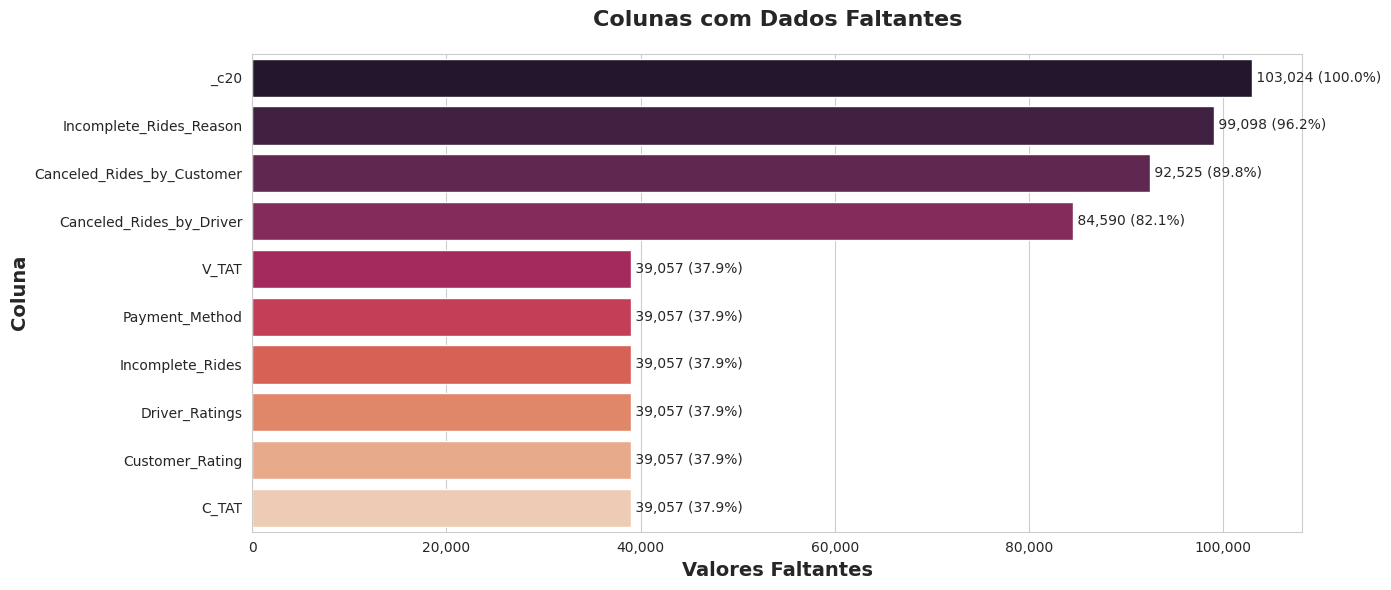

In [7]:
missing_data = df_missing.toPandas()
missing_data = missing_data.sort_values('Total', ascending=False)
top_missing = missing_data.head(10).reset_index(drop=True)

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(data=top_missing, y='Coluna', x='Total', hue='Coluna', ax=ax, palette='rocket', legend=False)

ax.set_xlabel('Valores Faltantes', fontsize=14, fontweight='bold')
ax.set_ylabel('Coluna', fontsize=14, fontweight='bold')
ax.set_title('Colunas com Dados Faltantes', fontsize=16, fontweight='bold', pad=20)

for i in range(len(top_missing)):
    row = top_missing.iloc[i]
    ax.text(row['Total'], i, f" {row['Total']:,.0f} ({row['%']:.1f}%)", 
            ha='left', va='center', fontsize=10)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

É imporante ressaltar que em alguns casos, campos nulos não indicam uma coisa ruim, como por exemplo os campos que falam sobre o cancelamento das corridas. Quando esses campos são nulos e não trazem um motivo, indica que a corrida não foi cancelada.

# 4. Data Profiling e Categorização

Como se deseja analisar as viagens de carros, viagens que nem foram iniciadas, que tem seu status como `Driver Not Found` não serão necessárias.

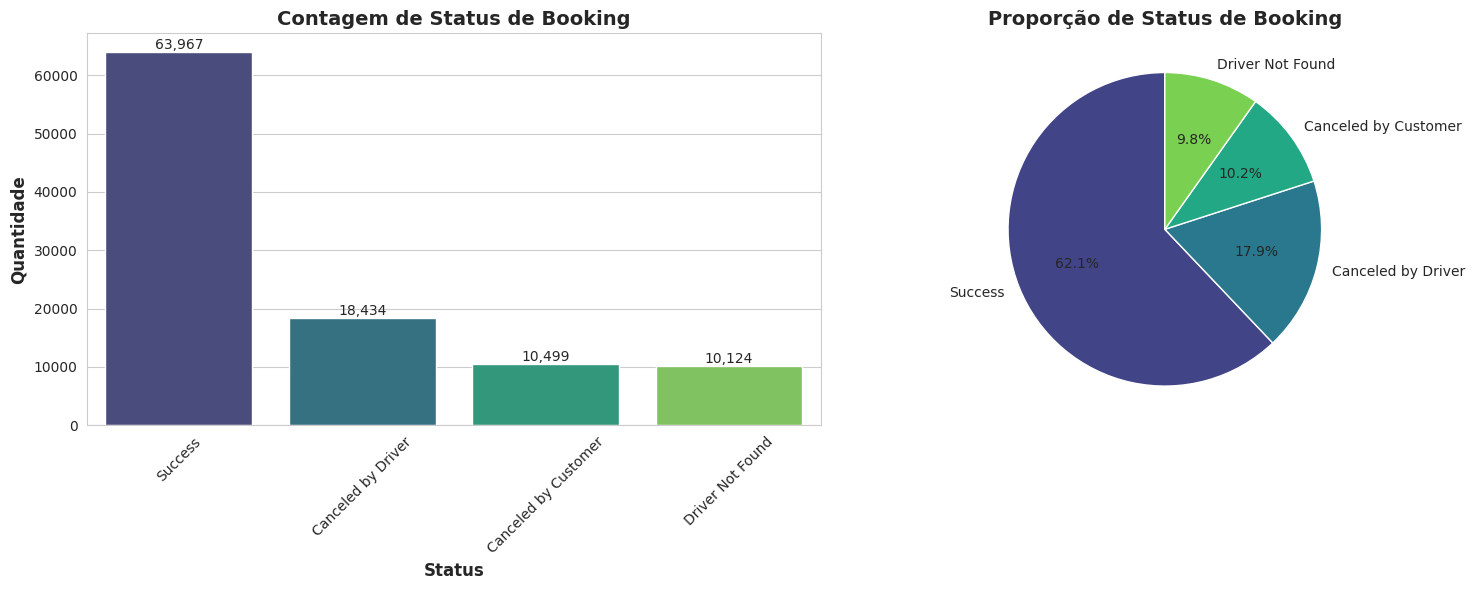

In [8]:
booking_status = df_raw.groupBy("Booking_Status").count().toPandas()
booking_status = booking_status.sort_values('count', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
sns.barplot(data=booking_status, x='Booking_Status', y='count', hue='Booking_Status', ax=ax1, palette='viridis', legend=False)
ax1.set_title('Contagem de Status de Booking', fontsize=14, fontweight='bold')
ax1.set_xlabel('Status', fontsize=12, fontweight='bold')
ax1.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(booking_status['count']):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom')

# Gráfico de pizza
colors = sns.color_palette('viridis', len(booking_status))
ax2.pie(booking_status['count'], labels=booking_status['Booking_Status'], autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Proporção de Status de Booking', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Outro aspecto importante é a variação entre os tipos de veículos com as corridas, para se ter uma quantidade uniforme de cada para se poder fazer as análises.

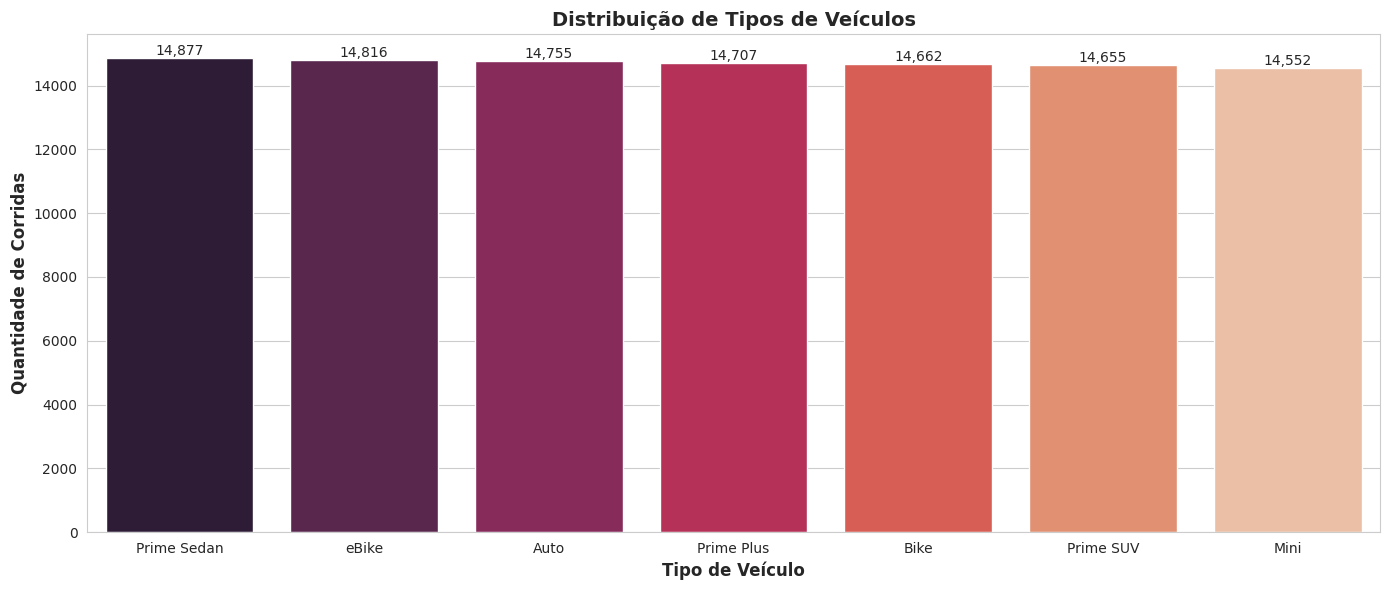

In [9]:
vehicle_types = df_raw.groupBy("Vehicle_Type").count().toPandas()
vehicle_types = vehicle_types.sort_values('count', ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(data=vehicle_types, x='Vehicle_Type', y='count', hue='Vehicle_Type', ax=ax, palette='rocket', legend=False)

ax.set_title('Distribuição de Tipos de Veículos', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Veículo', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade de Corridas', fontsize=12, fontweight='bold')

for i, v in enumerate(vehicle_types['count']):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Variação de quantidade de viagens por dia de semana.

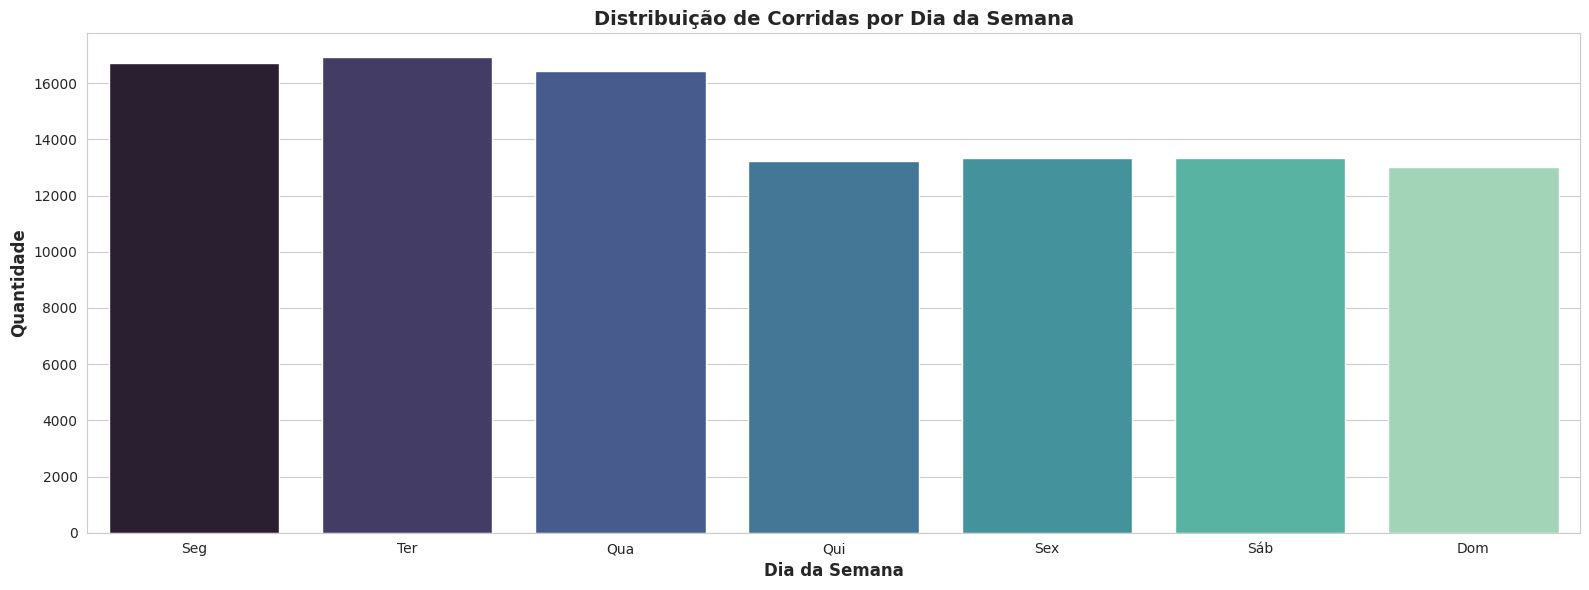

In [10]:
df_temporal = df_raw.select("Date", "Booking_Status").toPandas()
df_temporal['Date'] = pd.to_datetime(df_temporal['Date'])
df_temporal['Month'] = df_temporal['Date'].dt.month
df_temporal['DayOfWeek'] = df_temporal['Date'].dt.dayofweek
df_temporal['Hour'] = df_temporal['Date'].dt.hour

fig, ax = plt.subplots(figsize=(16, 6))

dow_dist = df_temporal.groupby('DayOfWeek').size().reset_index(name='count')
dow_labels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
dow_dist['DayName'] = dow_dist['DayOfWeek'].apply(lambda x: dow_labels[x])

sns.barplot(data=dow_dist, x='DayName', y='count', hue='DayName', ax=ax, palette='mako')

ax.set_title('Distribuição de Corridas por Dia da Semana', fontsize=14, fontweight='bold')
ax.set_xlabel('Dia da Semana', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Avaliação da Qualidade dos Dados

Realizando a análise da dispersão dos valores numéricos.

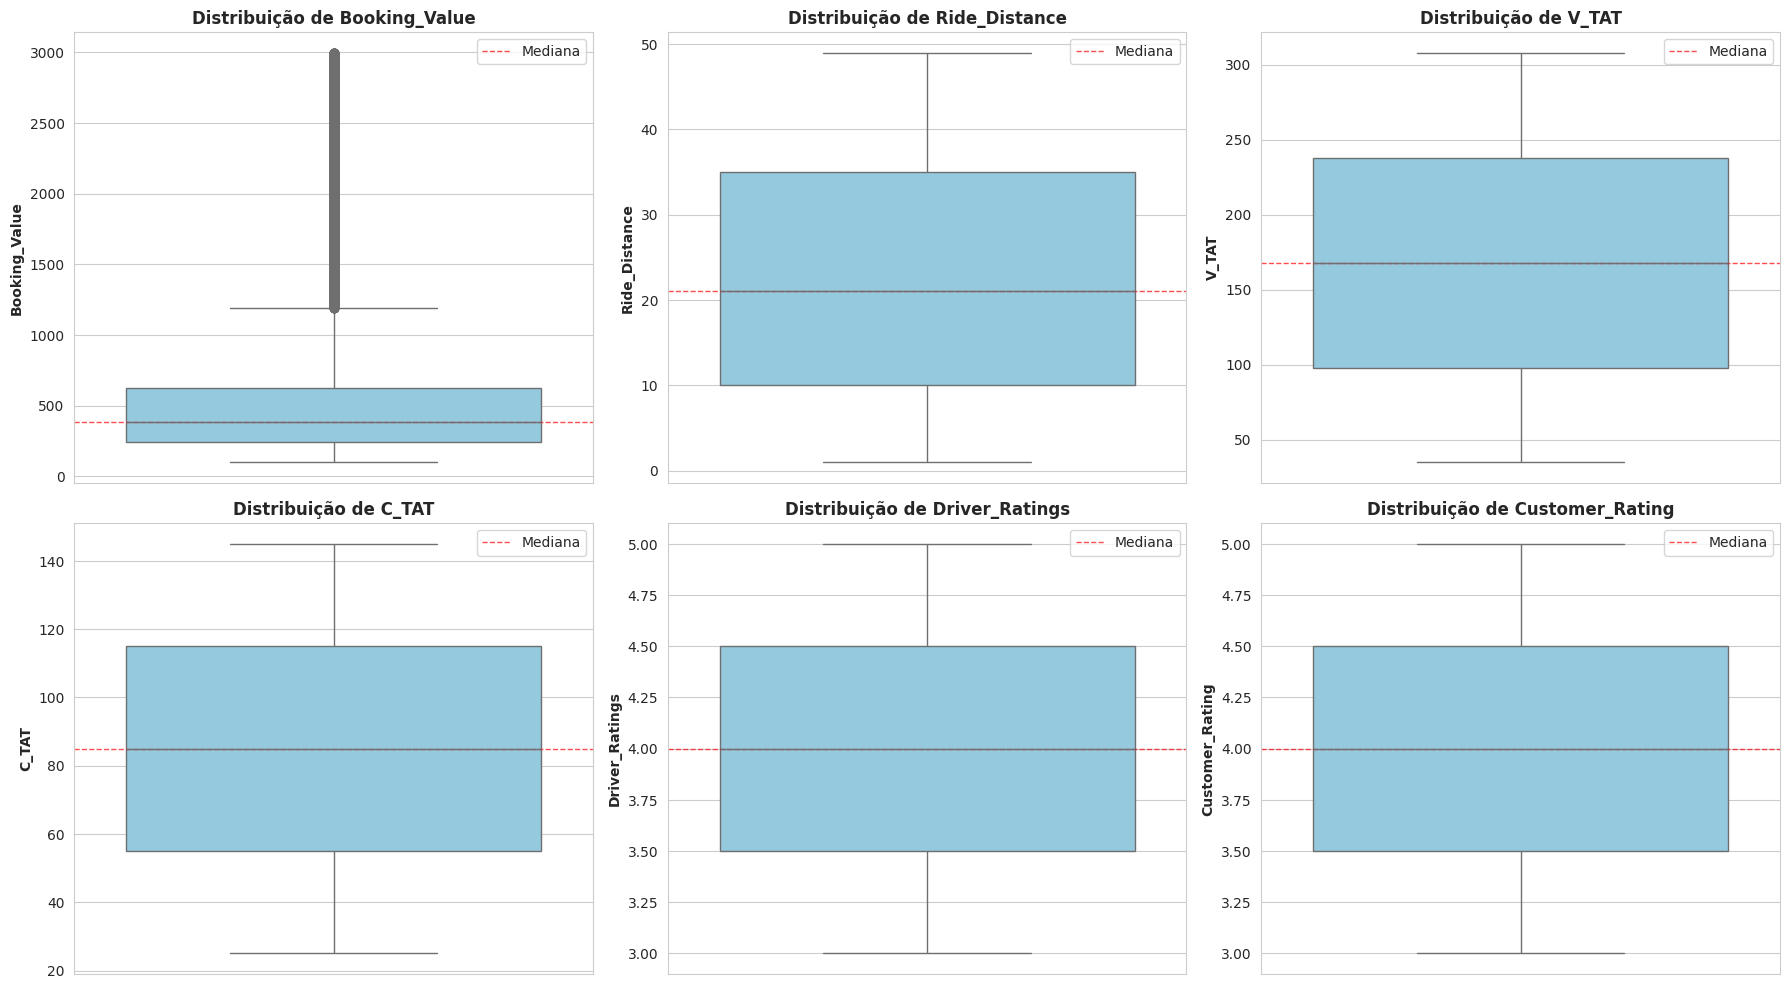

In [11]:
numeric_cols = ['Booking_Value', 'Ride_Distance', 'V_TAT', 'C_TAT', 
                'Driver_Ratings', 'Customer_Rating']

df_numeric = df_raw.filter(F.col("Booking_Status") == "Success").select(*numeric_cols).toPandas()

# Converter para numérico
for col in numeric_cols:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Boxplots para identificar outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df_numeric, y=col, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribuição de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10, fontweight='bold')
    
    # Adicionar estatísticas
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    median = df_numeric[col].median()
    axes[idx].axhline(median, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Mediana')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# 6. Identificação e Visualização de Outliers

Detecção de Outliers pelo Método de IQR.

         Coluna    Q1    Q3   IQR  Limite_Inferior  Limite_Superior  Qtd_Outliers  Percentual
  Booking_Value 242.0 622.0 380.0           -328.0           1192.0          5198    8.126065
  Ride_Distance  10.0  35.0  25.0            -27.5             72.5             0    0.000000
          V_TAT  98.0 238.0 140.0           -112.0            448.0             0    0.000000
          C_TAT  55.0 115.0  60.0            -35.0            205.0             0    0.000000
 Driver_Ratings   3.5   4.5   1.0              2.0              6.0             0    0.000000
Customer_Rating   3.5   4.5   1.0              2.0              6.0             0    0.000000


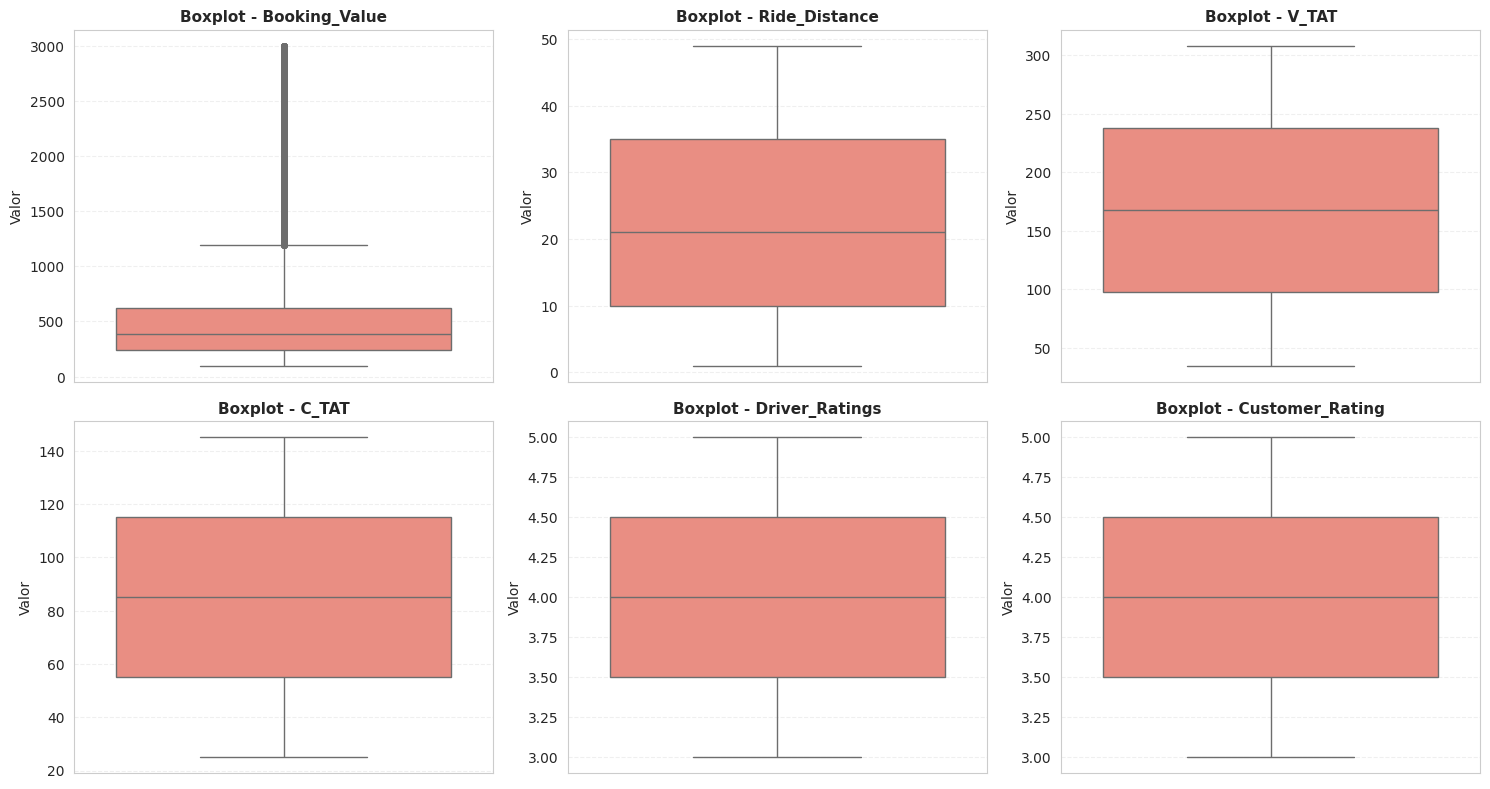

In [12]:
outlier_stats = []
for col in numeric_cols:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df_numeric)) * 100
    
    outlier_stats.append({
        'Coluna': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Limite_Inferior': lower_bound,
        'Limite_Superior': upper_bound,
        'Qtd_Outliers': outlier_count,
        'Percentual': outlier_pct
    })

outlier_df = pd.DataFrame(outlier_stats)
print(outlier_df.to_string(index=False))

num_cols = len(numeric_cols)
cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(
        y=df_numeric[col],
        ax=axes[i],
        color='salmon',
        showfliers=True,
        flierprops=dict(marker='o', markersize=4, alpha=0.5)
    )
    
    axes[i].set_title(f'Boxplot - {col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Valor')
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')


plt.tight_layout()
plt.show()

# 7. Detecção de Anomalias

Matriz de correlação para visualização dos dados numéricos.

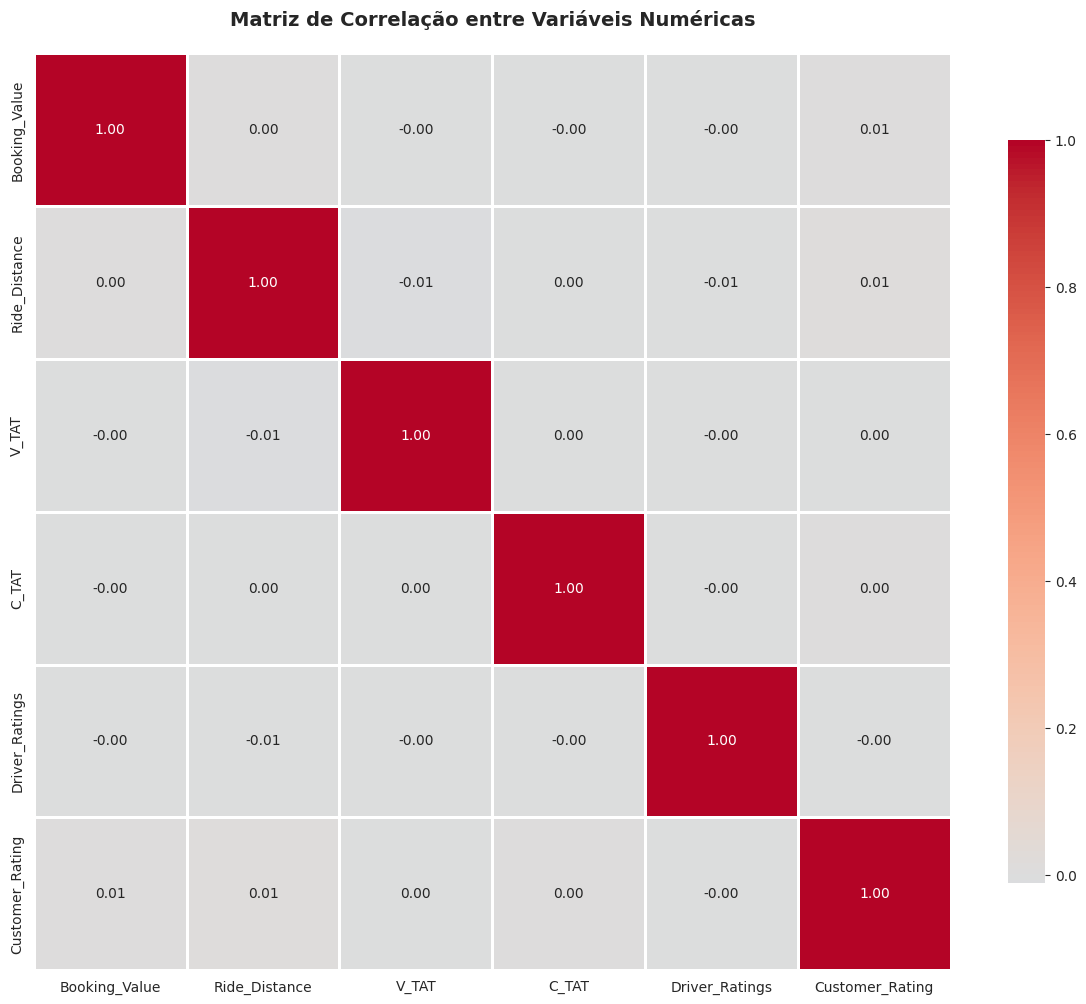

In [13]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

Visualização da distruibuição dos tipos de pagamentos usados.

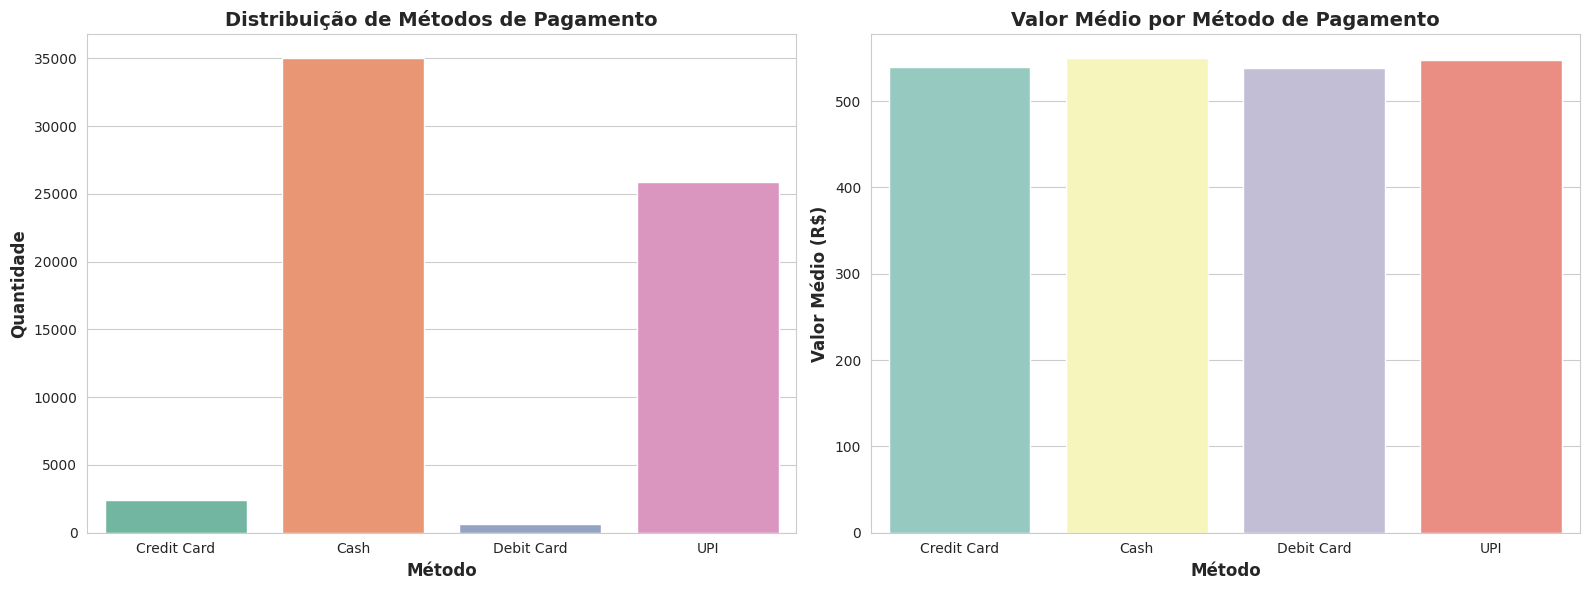

In [14]:
# Análise de métodos de pagamento
payment_analysis = df_raw.filter(F.col("Booking_Status") == "Success").groupBy("Payment_Method").agg(
    F.count("*").alias("Quantidade"),
    F.avg("Booking_Value").alias("Valor_Medio")
).toPandas()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=payment_analysis, x='Payment_Method', y='Quantidade', hue='Payment_Method', ax=ax1, palette='Set2', legend=False)
ax1.set_title('Distribuição de Métodos de Pagamento', fontsize=14, fontweight='bold')
ax1.set_xlabel('Método', fontsize=12, fontweight='bold')
ax1.set_ylabel('Quantidade', fontsize=12, fontweight='bold')

sns.barplot(data=payment_analysis, x='Payment_Method', y='Valor_Medio', hue='Payment_Method', ax=ax2, palette='Set3', legend=False)
ax2.set_title('Valor Médio por Método de Pagamento', fontsize=14, fontweight='bold')
ax2.set_xlabel('Método', fontsize=12, fontweight='bold')
ax2.set_ylabel('Valor Médio (R$)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Análise de rotas mais frequentes

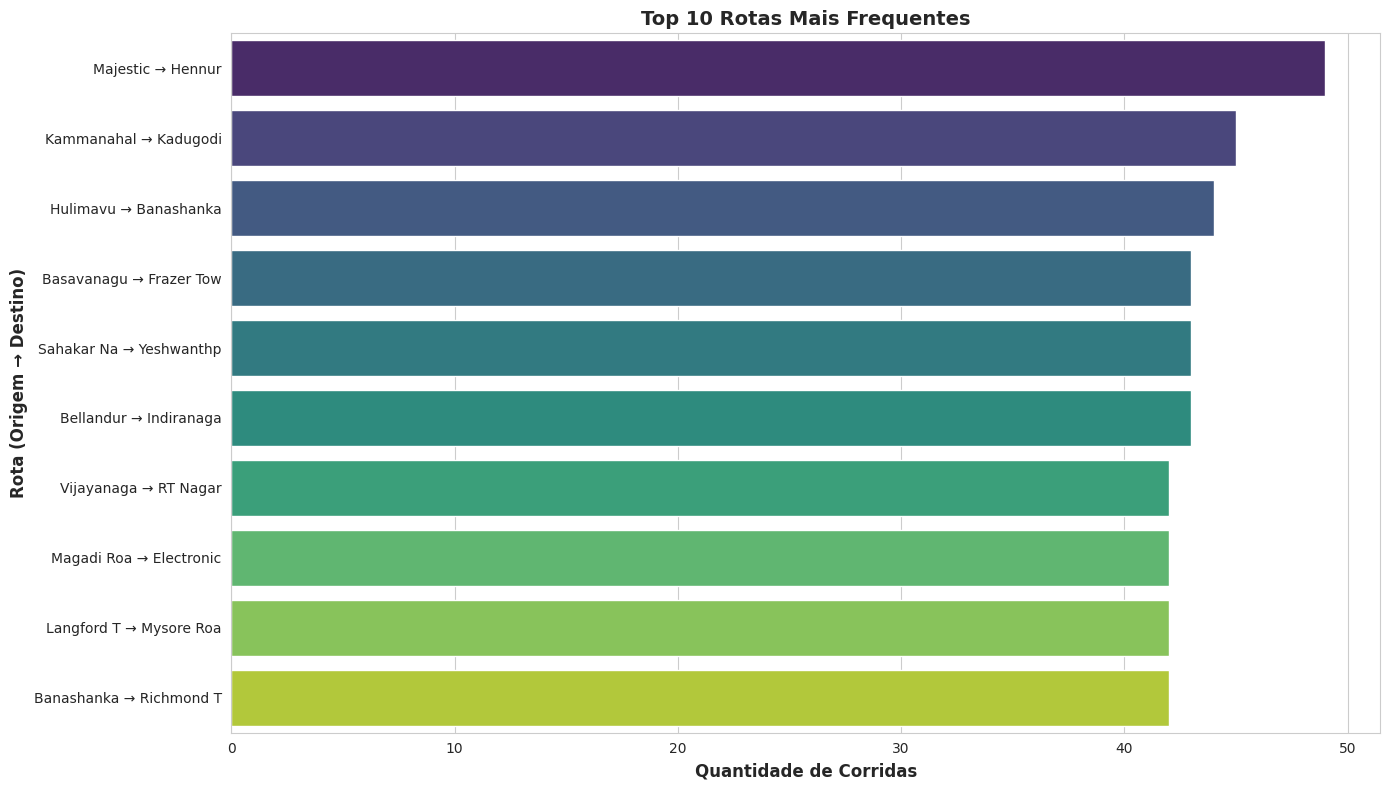

In [15]:
route_analysis = df_raw.filter(F.col("Booking_Status") == "Success").groupBy("Pickup_Location", "Drop_Location").agg(
    F.count("*").alias("Quantidade")
).orderBy(F.desc("Quantidade")).limit(10).toPandas()

plt.figure(figsize=(14, 8))
route_labels = [f"{row['Pickup_Location'][:10]} → {row['Drop_Location'][:10]}" for _, row in route_analysis.iterrows()]

sns.barplot(x='Quantidade', y=route_labels, data=route_analysis, palette='viridis', hue=route_labels)
plt.title('Top 10 Rotas Mais Frequentes', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Corridas', fontsize=12, fontweight='bold')
plt.ylabel('Rota (Origem → Destino)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()